### Model Training (3 Parts/Models)

Import packages and Load Data

In [17]:
# import packages for training
import pandas as pd
import numpy as np # Good to have for ML tasks
import os # Import the os module
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # Use later for evaluation

In [18]:
# Define the base path components
base_project_folder = r"C:\Users\comat\GitProjects\customer-churn-ai" # Raw string is fine here
data_subfolder = "data"
training_input_subfolder_name = "training_input"

# Construct the path to the 'training_input' directory robustly
training_input_path = os.path.join(base_project_folder, data_subfolder, training_input_subfolder_name)

# Define full file paths using os.path.join(). (these should match what you saved them as)
x_train_path = os.path.join(training_input_path, "X_train.parquet")
x_test_path = os.path.join(training_input_path, "X_test.parquet")
y_train_path = os.path.join(training_input_path, "y_train.parquet")
y_test_path = os.path.join(training_input_path, "y_test.parquet")

try:
    # Load DataFrames (X_train, X_test)
    X_train = pd.read_parquet(x_train_path)
    X_test = pd.read_parquet(x_test_path)
    print(f"X_train loaded successfully. Shape: {X_train.shape}")
    print(f"X_test loaded successfully. Shape: {X_test.shape}")

    # Load y_train and y_test (they were saved as DataFrames with a 'Churn' column)
    y_train_df = pd.read_parquet(y_train_path)
    y_test_df = pd.read_parquet(y_test_path)

    # Convert y_train and y_test back to Pandas Series for scikit-learn
    if 'Churn' in y_train_df.columns and 'Churn' in y_test_df.columns:
        y_train = y_train_df['Churn']
        y_test = y_test_df['Churn']
        print(f"\ny_train loaded successfully. Shape: {y_train.shape}")
        print(f"y_test loaded successfully. Shape: {y_test.shape}")
        print("\nAll datasets loaded and y_train/y_test converted to Series.")
    else:
        print("Error: 'Churn' column not found in loaded y_train_df or y_test_df.")
        # Handle error or stop if target is not loaded correctly

except FileNotFoundError:
    print(f"Error: One or more Parquet files not found. Please check paths:")
    print(f"  X_train expected at: {x_train_path}")
    print(f"  X_test expected at: {x_test_path}")
    print(f"  y_train expected at: {y_train_path}")
    print(f"  y_test expected at: {y_test_path}")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

X_train loaded successfully. Shape: (5634, 27)
X_test loaded successfully. Shape: (1409, 27)

y_train loaded successfully. Shape: (5634,)
y_test loaded successfully. Shape: (1409,)

All datasets loaded and y_train/y_test converted to Series.


In [19]:
# Display the head of X_train and first 5 of y_train to verify
print("\nHead of X_train:")
print(X_train.head())
print("\nHead of y_train:")
print(y_train.head())


Head of X_train:
   SeniorCitizen  MonthlyCharges  TotalCharges  gender_Male  Partner_Yes  \
0              0       -0.521976     -0.263871         True        False   
1              0        0.337478     -0.505423         True         True   
2              0       -0.809013     -0.751850         True         True   
3              0        0.284384     -0.174271        False         True   
4              0       -0.676279     -0.991514         True         True   

   Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0           False             False              False   
1            True              True              False   
2            True             False              False   
3           False              True              False   
4            True              True              False   

   InternetService_Fiber optic  InternetService_No  ...  Contract_Two year  \
0                        False               False  ...              False   
1                   

---
#### Model 1: Train Logistic Regression Model
Initialize Logistic Regression Model and Train the Model

In [20]:
# 1. Initialize the Logistic Regression Model
# Begin with mostly default parameters. `liblinear` solver used for binary classification and small datasets.
# `random_state` used for reproducibility of results if solver involves randomness.
# `max_iter` set to 1000 to ensure convergence for complex datasets. default is 100.
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
print("Logistic Regression model initialized with solver='liblinear' and max_iter=1000.")

# 2. Fit/Train the model using the training data.
print("\nTraining the Logistic Regression model...")
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")

Logistic Regression model initialized with solver='liblinear' and max_iter=1000.

Training the Logistic Regression model...
Logistic Regression model trained successfully!


In [21]:
# QUICK Check on training accuracy [NOT a substitute for test set evaluation!]
# This just tells us how well the model fits the data it learned from.
y_train_pred_log_reg = log_reg_model.predict(X_train)
train_accuracy_log_reg = accuracy_score(y_train, y_train_pred_log_reg)
print(f"Quick check: Training Accuracy for Logistic Regression: {train_accuracy_log_reg:.4f}")

Quick check: Training Accuracy for Logistic Regression: 0.8048


---
**Insights / Notes: Logistic Regression**
* 0.8 is strong! I will come back and do a deeper analysis  

*  

    

---
---

#### Model 2: Train Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest Classifier model
# Start with common default values; set a random_state for reproducibility.
# n_estimators is the number of trees in the forest. n_jobs=-1 uses all available CPU cores for training to boost speed.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("Random Forest Classifier model initialized with n_estimators=100 and n_jobs=-1")

# 2. Fit/Train the model using the training data.
print("\nTraining the Random Forest Regression model...(get comfy)")
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")

Random Forest Classifier model initialized with n_estimators=100 and n_jobs=-1

Training the Random Forest Regression model...(get comfy)
Random Forest model trained successfully!


In [23]:
# QUICK Check on training accuracy [NOT a substitute for test set evaluation!]
# This just tells us how well the model fits the data it learned from.
try:
    y_train_pred_rf = rf_model.predict(X_train)
    train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
    print(f"\nQuick check: Training Accuracy for Random Forest: {train_accuracy_rf:.4f}")
except Exception as e:
    print(f"Could not calculate training score: {e}")


Quick check: Training Accuracy for Random Forest: 0.9980


---
**Insights / Notes: Random Forest**
* 0.9980 is even stronger! I will come back and do a deeper analysis  

*  

    

---
---

#### Model 3: Train XGBoost Model

In [24]:
from xgboost import XGBClassifier

# 1. Initialize the XGBoost Classifier model
# We'll set a random_state for reproducibility.
# For binary classification, specify objective with 'binary:logistic'.
# eval_metric can be set to 'logloss' or 'auc' for classification.
xgb_model = XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss',    # A common metric for binary classification
                          random_state=42)

print("XGBoost model initialized.")

# 2. Fit/Train the model using the training data.
print("\nTraining the XGBoost model... (This might also take a moment)")
xgb_model.fit(X_train, y_train)
print("XGBoost model trained successfully!")

XGBoost model initialized.

Training the XGBoost model... (This might also take a moment)
XGBoost model trained successfully!


In [25]:
# QUICK Check on training accuracy [NOT a substitute for test set evaluation!]
# This just tells us how well the model fits the data it learned from.
try:
    y_train_pred_xgb = xgb_model.predict(X_train)
    train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
    print(f"\nQuick check: Training Accuracy for XGBoost: {train_accuracy_xgb:.4f}")
except Exception as e:
    print(f"Could not calculate training score: {e}")


Quick check: Training Accuracy for XGBoost: 0.9322


---
**Insights / Notes: XGBoost**
* 0.9320 is just behind RF and ahead of LR. All three are great!
* I will come back and do a deeper analysis  

*  

    

---
---

### Day 7: Model Evaluation

---
#### 7.01 Evaluate Logistic Regression Model

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



--- Evaluating Logistic Regression Model ---

--- Logistic Regression Metrics ---
Accuracy:  0.7984
Precision: 0.6573
Recall:    0.5027
F1-Score:  0.5697
AUC:       0.8362

Confusion Matrix (Logistic Regression):
[[937  98]
 [186 188]]


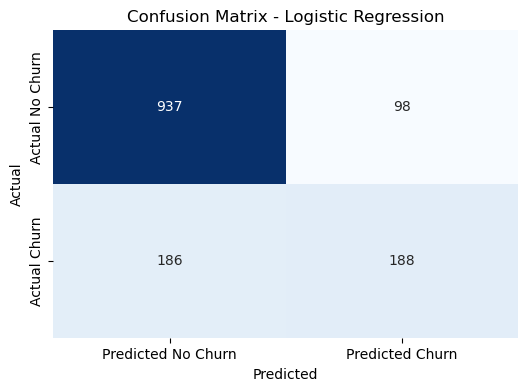


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

No Churn (0)       0.83      0.91      0.87      1035
   Churn (1)       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [27]:
# 1. Make predictions on the test set
print("\n\n--- Evaluating Logistic Regression Model ---")
y_pred_log_reg = log_reg_model.predict(X_test)

# For AUC, we need probability scores for the positive class (Churn=1)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

# 2. Calculate Eval Metrics
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
precision_lr = precision_score(y_test, y_pred_log_reg)
recall_lr = recall_score(y_test, y_pred_log_reg)
f1_lr = f1_score(y_test, y_pred_log_reg)
auc_lr = roc_auc_score(y_test, y_pred_proba_log_reg)

# 3. Print Evaluation Metrics
print("\n--- Logistic Regression Metrics ---")
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"AUC:       {auc_lr:.4f}")

# 4. Display Confusion Matrix
print("\nConfusion Matrix (Logistic Regression):")
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
print(cm_lr)
# For a more visual display of the confusion matrix (optional, but nice):
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5. Display Classification Report (provides precision, recall, f1-score per class)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg, target_names=['No Churn (0)', 'Churn (1)']))

---
* Results are looking much more realistic than what was being output previously when there was data leakage from the HF sentiment features. 
* See notebook day-6-7-data_leakage.ipynb  
    
**Insights / Notes: Logistic Regression**
* Highest overall "test score" (AUC) and was very careful with churn (high Precision for churners), making fewer wrong accusations. However, it missed about half the customers who did churn (moderate Recall for churners).

---
---

---
#### 7.02 Evaluate Random Forest Model



--- Evaluating Random Forest Model ---

--- Random Forest Metrics ---
Accuracy:  0.7828
Precision: 0.6149
Recall:    0.4866
F1-Score:  0.5433
AUC:       0.8189

Confusion Matrix (Random Forest):
[[921 114]
 [192 182]]


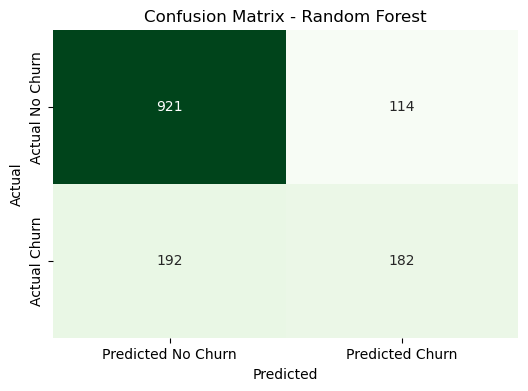


Classification Report (Random Forest):
              precision    recall  f1-score   support

No Churn (0)       0.83      0.89      0.86      1035
   Churn (1)       0.61      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [28]:
# 1. Make predictions on the test set
print("\n\n--- Evaluating Random Forest Model ---")
y_pred_rf = rf_model.predict(X_test)

# For AUC, we need probability scores for the positive class (Churn=1)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 2. Calculate Eval Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# 3. Print Evaluation Metrics
print("\n--- Random Forest Metrics ---")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"AUC:       {auc_rf:.4f}")

# 4. Display Confusion Matrix
print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# For a more visual display of the confusion matrix (optional, but nice):
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5. Display Classification Report (provides precision, recall, f1-score per class)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn (0)', 'Churn (1)']))


---
**Insights / Notes: Random Forest**
* Performed decently overall but was a bit less effective at both precisely identifying churners and catching all of them compared to the others.

---
---

---
#### 7.03 Evaluate XGBoost Model



--- Evaluating XGBoost Model ---

--- XGBoost Metrics ---
Accuracy:  0.7913
Precision: 0.6212
Recall:    0.5481
F1-Score:  0.5824
AUC:       0.8209

Confusion Matrix (Random Forest):
[[910 125]
 [169 205]]


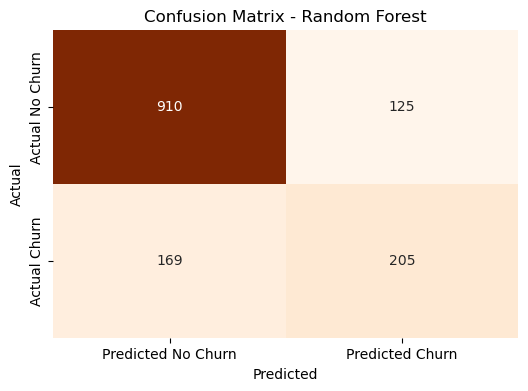


Classification Report (Random Forest):
              precision    recall  f1-score   support

No Churn (0)       0.84      0.88      0.86      1035
   Churn (1)       0.62      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [29]:
# 1. Make predictions on the test set
print("\n\n--- Evaluating XGBoost Model ---")
y_pred_xgb = xgb_model.predict(X_test)

# For AUC, we need probability scores for the positive class (Churn=1)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 2. Calculate Eval Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# 3. Print Evaluation Metrics
print("\n--- XGBoost Metrics ---")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"AUC:       {auc_xgb:.4f}")

# 4. Display Confusion Matrix
print("\nConfusion Matrix (Random Forest):")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

# For a more visual display of the confusion matrix (optional, but nice):
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5. Display Classification Report (provides precision, recall, f1-score per class)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_xgb, target_names=['No Churn (0)', 'Churn (1)']))


---
**Insights / Notes: XGBoost**
* Best at "catching" the customers who were going to churn (highest Recall for churners) and had the best balance (F1-score) for that group. Occasionally misidentified a few more non-churners as churners (higher FP) compared to Logistic Regression.
 

---
---

#### **Overall Analysis**
**Accuracy**:
- `(TP + TN) / Total` - Overall, what fraction of predictions were correct? (Can be misleading if classes are imbalanced).
    - ***Logistic Regression*** performed the best, but it is marginal at 0.9%  

**AUC (Area Under the ROC Curve):** 
- The ROC curve plots True Positive Rate (Recall) against False Positive Rate at various threshold settings. AUC distinguishing between a random customer who will churn and one who won't, across various probability thresholds. An AUC of 0.5 is random guessing; an AUC of 1.0 is perfect classification.
    - ***Logistic Regression*** is the best at distinguising between a randome customer who will churn and one who won't  

**Identifying Churner** **Recall (Sensitivity or True Positive Rate):**
- `TP / (TP + FN)` - Of all customers who _actually_ churned, how many did the model correctly identify? (Measures "completeness" or ability to find all churners).
    - ***XGBoost*** leads here with a Recall of 0.5481. This means it correctly identified about 54.8% of the customers who actually churned in the test set. This is often a very important metric in churn prediction, as missing a potential churner (a False Negative) can be costly.  

**Precision**:
-  `TP / (TP + FP)` - Of all customers the model predicted would churn, how many _actually_ churned? (Measures the "exactness" of positive predictions).
    - ***Logistic Regression*** performed the best by 5.81%.
    -  LR predicts a customer will churn 65.7% of the time. **Important if the cost of retention efforts is high** and you want to minimize outreach to customers who weren't actually going to churn.  
    
**F1-Score**:
- `2 * (Precision * Recall) / (Precision + Recall)` - The harmonic mean of Precision and Recall. It's a good single metric when you care about both false positives and false negatives, especially with imbalanced classes.
    - ***XGBoost*** has the highest F1-Score (0.5824) for the churn class, indicating the best balance between Precision and Recall for identifying churners. Logistic Regression (0.5697) is next.

---

**Model Choice**
* Identify as many actual churners as possible (maximize Recall for churners), even if it means contacting a few extra non-churners:
    * ***XGBoost*** is the strongest performer due to its higher Recall and F1-score for the churn class, and the lowest number of False Negatives.
    * Often, for churn, Recall for the churn class is prioritized because the cost of losing a customer is usually higher than the cost of a retention effort.  
  

* Be as precise when you predict churn (minimize efforts on non-churners):
    * ***Logistic Regression*** has the edge with higher Precision for churners.

* Overall ability to distinguish: Logistic Regression has a slight edge in AUC.
---
---

#### 7.10  Model Explainability with SHAP

In [30]:
import shap

# X_test is a Pandas DataFrame and will help SHAP automatically use your feature names
# for plots

# 1. Create a SHAP explainer object for your XGBoost model
# Initialize TreeExplainer because it is efficient for tree-based models like XGBoost.
print("Creating SHAP TreeExplainer for the XGBoost model...")
explainer_xgb = shap.TreeExplainer(xgb_model)
print("SHAP Explainer created.")

# 2. Calculate SHAP values for your test set (X_test)
# This can take a bit of time for larger datasets or many features.
print("\nCalculating SHAP values for X_test...")
shap_values_xgb_test = explainer_xgb.shap_values(X_test)
print("SHAP values calculated for X_test.")

# For binary classification with TreeExplainer, shap_values might be a single array
# representing the SHAP values for the positive class, or it might be a list of two arrays
# (one for each class). We often focus on the positive class (Churn=1).
# If shap_values_xgb_test is a list of two arrays, we usually take the second one (for class 1).
# If xgb_model.predict_proba returns two columns, shap_values often has two components.
# Let's check the type/shape if needed later. For now, this is the standard call.

#Check the shape of the output. It should be (number_of_samples, number_of_features).
print(f"\nShape of the calculated SHAP values: {shap_values_xgb_test.shape}")

Creating SHAP TreeExplainer for the XGBoost model...
SHAP Explainer created.

Calculating SHAP values for X_test...


SHAP values calculated for X_test.

Shape of the calculated SHAP values: (1409, 27)


---
#### 7.11 Visualizing Model Explanations with SHAP Plots

Generating SHAP summary plot...


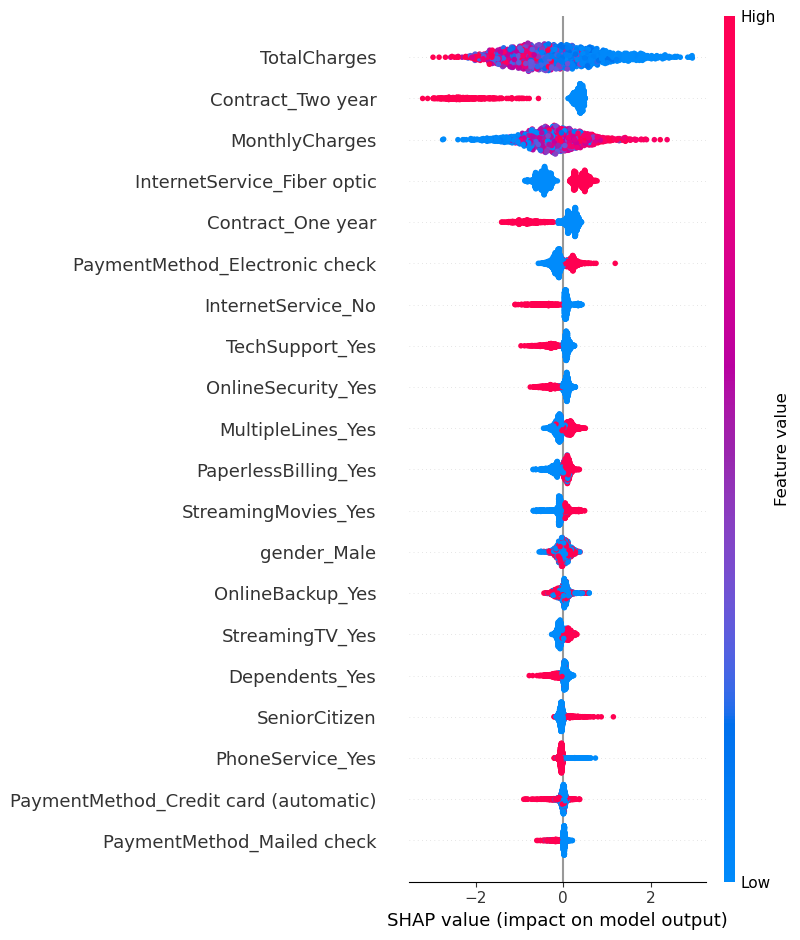

In [31]:
# 3. Generate a SHAP summary plot to see global feature importance
# This plot will rank features and show the impact of their values on predictions.
print("Generating SHAP summary plot...")
shap.summary_plot(shap_values_xgb_test, X_test)

##### Inititial Analysis:
- TotalCharges, Contract_Two year, and Monthly Charges are the most important
- Contract_Two Year:
    - single most powerful factor for predicting a customer will not churn
    - If a customer has a two year contract. They are NOT likely to churn.
- Contract_One Year:
    - closer to center but still showing those with contract unlikely to churn
- InternetService
    - second predictor of churn
    - If they do have Internet Serivice they are unlikely to churn
- Senior Citizens: Likely to churn


# **Return and Analyze using this guide**

### ***Let's Read Your Top 3 Features Like This:***  

**Feature 1**: Contract_Two year (The Strongest Puller)  
- What we see: Look at the top row. Almost all the dots are on the left side (pulling towards "No Churn"). The red dots (meaning the customer has a two-year contract) are clustered way on the far left. The blue dots (customer does not have a two-year contract) are clustered near the middle.
- Plain English Interpretation: "Having a two-year contract is the single most powerful factor for predicting a customer will not churn. If a customer has one (red dots), this feature gives a massive pull towards the 'No Churn' side of the tug-of-war."  

**Feature 2**: InternetService_Fiber optic (A Two-Way Puller)  
- What we see: Now look at the second row. The dots are spread out. The red dots (customer has Fiber optic) are mostly on the right side (pulling towards "Churn"). The blue dots (customer does not have Fiber) are on the left side (pulling towards "No Churn").
- Plain English Interpretation: "Having Fiber optic internet is the second most important factor, and it pushes the prediction towards yes, this customer will churn. This is a key business insight! Perhaps these plans are more expensive or have had reliability issues. Conversely, not having Fiber is a pull towards 'No Churn'."  

**Feature 3**: TenureGrp_61-72 Months (Another Strong Puller)  
- What we see: This looks very similar to Contract_Two year. The red dots (customer's tenure is in the 61-72 month group) are all packed on the far left. The blue dots (customer is not in this long-term group) are scattered more towards the middle and right.
- Plain English Interpretation: "Being a very long-term customer (5-6 years) is a very strong factor for predicting a customer will not churn. If a customer falls in this group (red dots), this feature gives a strong pull to the 'No Churn' side."  

### ***How to Read Any Feature on This Chart:***
1. Find the feature on the list (the higher it is, the more impact it has overall).
2. Look where the RED dots are. This tells you what happens when that feature's value is high. If they are on the right, high values push towards churn. If on the left, high values push towards staying.
3. Look where the BLUE dots are. This tells you what happens when that feature's value is low.  

**Summary Bullets (The Cheat Sheet):**
- Feature Importance: Top of the list = most important.
- Churn Prediction Push: Right side of center = pushes towards "Yes, Churn!". Left side = pushes towards "No Churn!".
- Feature's Own Value: Red = high value (e.g., high MonthlyCharges, or True/1). Blue = low value (e.g., low MonthlyCharges, or False/0).  

So, for Contract_Two year, the red dots (having the contract) are on the left (pushing towards "No Churn"). That's the core insight for that feature.

I hope this "tug-of-war" analogy and the specific examples from your chart make it easier to understand! Does this clear things up?

---


#### 7.12 Storing Your Model's Predictions


In [44]:
# Step 1: Load a DataFrame that contains the original customerID to map back
# The one saved after sentiment analysis but before feature engineering is a good choice.
original_data_path = r"C:\Users\comat\GitProjects\customer-churn-ai\data\telco_churn_with_hf_sentiment.parquet"
try:
    df_with_id = pd.read_parquet(original_data_path)
    print(f"Successfully loaded '{original_data_path}' to look up customerIDs.")
except Exception as e:
    print(f"Could not load original data to get customerIDs: {e}")
    df_with_id = None

# Step 2: Create a new DataFrame for the predictions
# The index of y_test aligns with the original DataFrame's index
predictions_df = pd.DataFrame(index=y_test.index)

# If successfully loaded the original df, get the corresponding customerID
if df_with_id is not None:
    predictions_df['customerID'] = df_with_id.loc[y_test.index, 'customerID']
else:
    # As a fallback, just use the index if customerID isn't available
    predictions_df['original_index'] = y_test.index

# Step 3: Add the true values, predicted values, and predicted probabilities
predictions_df['Actual_Churn'] = y_test
predictions_df['Predicted_Churn'] = y_pred_xgb
predictions_df['Predicted_Churn_Probability'] = y_pred_proba_xgb

print("\nPreview of the final predictions DataFrame:")
print(predictions_df.head())

# Step 4: Save the predictions DataFrame to a CSV file
base_project_folder = r"C:\Users\comat\GitProjects\customer-churn-ai" # Raw string is fine here
data_subfolder = "data"
predictions_subfolder = "model_predictions"
# Construct the path to the 'training_input' directory robustly
predictions_folder_path = os.path.join(base_project_folder, data_subfolder, predictions_subfolder)
predictions_file_path = os.path.join(predictions_folder_path, "xgb_churn_predictions.csv")

try:
    os.makedirs(predictions_folder_path, exist_ok=True)
    print(f"\nEnsured directory exists to: {predictions_file_path}")
except Exception as e:
    print(f"\nCould not create directory for predictions: {e}")

try:
    predictions_df.to_csv(predictions_file_path, index=False)
    print(f"\nPredictions successfully saved to: {predictions_file_path}")
except Exception as e:
    print(f"An error occurred while saving predictions: {e}")


Successfully loaded 'C:\Users\comat\GitProjects\customer-churn-ai\data\telco_churn_with_hf_sentiment.parquet' to look up customerIDs.

Preview of the final predictions DataFrame:
   customerID  Actual_Churn  Predicted_Churn  Predicted_Churn_Probability
0  7590-VHVEG             0                0                     0.002656
1  5575-GNVDE             0                1                     0.932263
2  3668-QPYBK             0                0                     0.065697
3  7795-CFOCW             0                0                     0.401297
4  9237-HQITU             0                0                     0.000839

Ensured directory exists to: C:\Users\comat\GitProjects\customer-churn-ai\data\model_predictions\xgb_churn_predictions.csv

Predictions successfully saved to: C:\Users\comat\GitProjects\customer-churn-ai\data\model_predictions\xgb_churn_predictions.csv
